# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
X_train=pd.read_csv('./X_train.csv', index_col=[0,1])
X_test=pd.read_csv('./X_test.csv', index_col=[0,1])
y_train=pd.read_csv('./UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
y_test=pd.read_csv('./UCI HAR Dataset/test/y_test.txt', header=None, delim_whitespace=True)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [8]:
clf = DecisionTreeClassifier(random_state=2360873, max_depth=4).fit(X_train, y_train)

In [9]:
feature_importances = pd.DataFrame({

   'Variável': X_train.columns,

   'Importância': clf.feature_importances_

}).sort_values(by='Importância', ascending=False)

top_3_features = feature_importances.head(3)['Variável']
top_3_features

56     tGravityAcc-energy()-X
265         fBodyAcc-mean()-X
559      angle(Y,gravityMean)
Name: Variável, dtype: object

In [10]:
X_train = X_train[top_3_features]

X_train

,,tGravityAcc-energy()-X,fBodyAcc-mean()-X,"angle(Y,gravityMean)"
,Subject,,,
3229,16,0.682264,-0.404647,-0.008996
6988,30,0.897969,-0.971910,0.210314
5189,25,0.694929,-0.498815,0.163278
6263,28,0.875725,-0.996799,0.247250
888,5,0.938723,-0.972121,0.132197
...,...,...,...,...
3605,19,0.837704,-0.951042,0.251008
5669,26,0.825980,-0.321377,0.252466
1267,6,0.760463,0.276995,0.221396


In [11]:
X_valid = X_valid[top_3_features]

X_valid

,,tGravityAcc-energy()-X,fBodyAcc-mean()-X,"angle(Y,gravityMean)"
,Subject,,,
3099,16,0.743891,-0.996604,0.195996
4058,21,-0.862794,-0.975521,-0.392671
4850,23,0.788912,0.162753,0.167329
7164,30,0.829959,-0.478572,0.253537
302,1,0.831002,0.103166,0.267205
...,...,...,...,...
7078,30,0.890673,-0.400626,0.206435
1647,8,0.129257,-0.983153,-0.256623
4277,21,-0.903407,-0.975486,-0.367166


In [12]:
X_test = X_test[top_3_features]

X_test

,,tGravityAcc-energy()-X,fBodyAcc-mean()-X,"angle(Y,gravityMean)"
,Subject,,,
0,2,0.829297,-0.918510,0.276801
1,2,0.805575,-0.960903,0.281343
2,2,0.812044,-0.991906,0.280083
3,2,0.809379,-0.993030,0.284114
4,2,0.803500,-0.992404,0.290722
...,...,...,...,...
2942,24,0.712964,-0.335539,0.274627
2943,24,0.713748,-0.250424,0.273578
2944,24,0.712784,-0.362640,0.274479


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

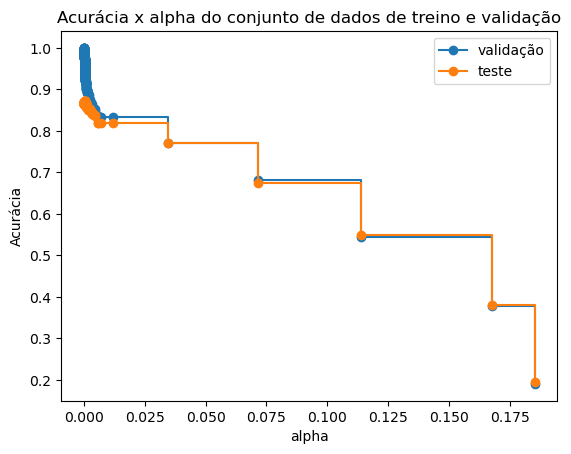

CPU times: total: 7.09 s
Wall time: 7.11 s


In [15]:
%%time
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)
    
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()    

In [16]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 87.21


DecisionTreeClassifier(ccp_alpha=0.00040502962156933864, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [23]:
activity_label = pd.read_csv('./UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None, index_col=[0], names=['Index', 'Activity'])
activity_label.iloc[:,0].values

array(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
       'STANDING', 'LAYING'], dtype=object)

Acurácia: 69.94


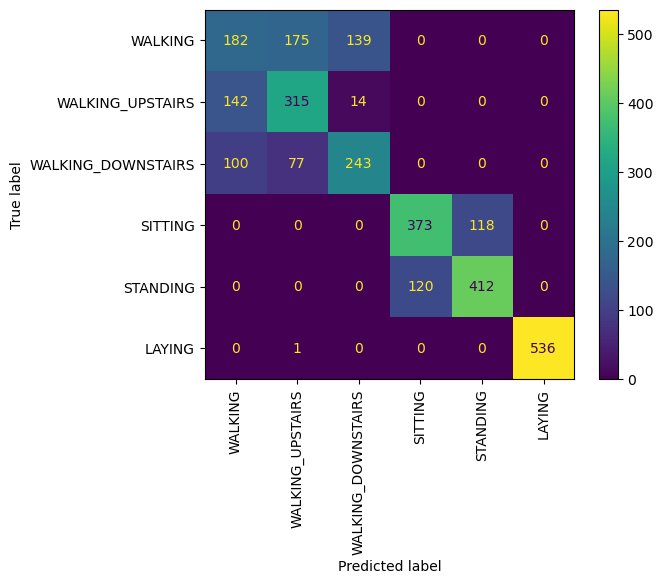

In [51]:
acuracia_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')

cm = confusion_matrix(y_test, melhor_arvore.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=activity_label.iloc[:,0].values).plot()
plt.xticks(rotation=90);